In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5) # Definindo tamanho das figuras

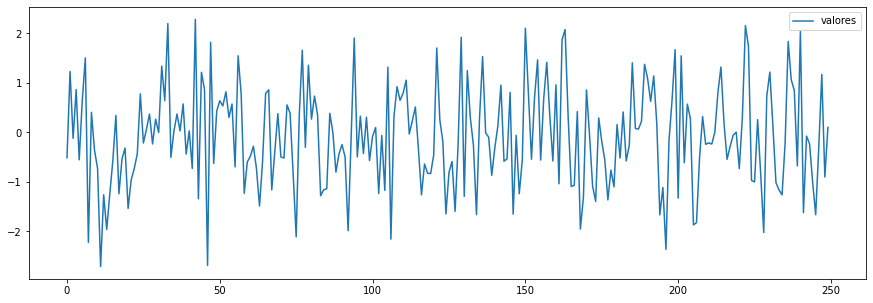

In [22]:
# Definindo dataframe
df = pd.DataFrame(np.random.randn(250),columns=['valores'])
df.plot()

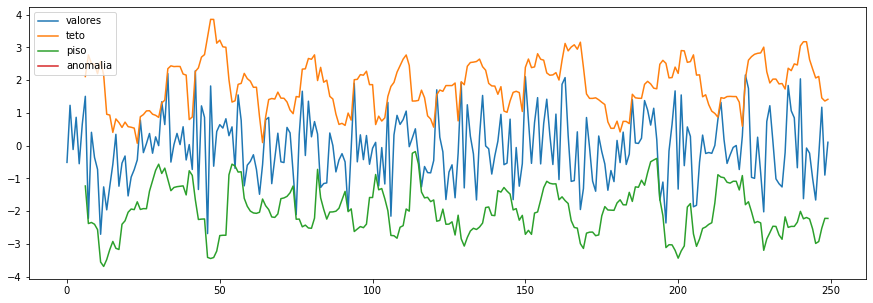

In [27]:
df["teto"] = df['valores'].rolling(window=7).mean() + (2 * df['valores'].rolling(window=7).std())
df["piso"] = df['valores'].rolling(window=7).mean() - (2 * df['valores'].rolling(window=7).std())

df.plot()

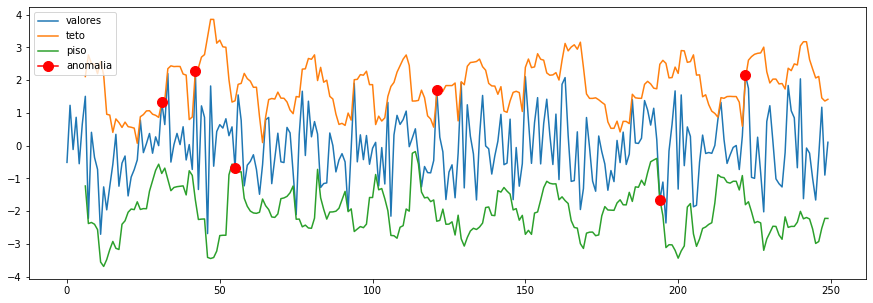

In [28]:
df["anomalia"] = df.apply(lambda row: 
                          row['valores'] if (row['valores']<=row["piso"] or row[0]>=row["teto"]) else None,axis=1)
df.drop(['anomalia'],axis=1).plot()
plt.plot(df.index, df.anomalia,color='red',marker='o',markersize=10,label='anomalia')
plt.legend()

plt.show()